# Esercizio 11.3

Come prima cosa vedo come sono distribuiti i miei dati.

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [5]:
np.random.seed(0)

def sin(x):
    s=[]
    for i in x:
        s.append(np.sin(i[0]*i[0]+i[1]*i[1]))
    return np.asarray(s)  

X_train = np.random.uniform(-3/2, 3/2,(500,2))
X_valid= np.random.uniform(-3/2, 3/2,(100,2))


y_target_train=sin(X_train)
y_target_valid=sin(X_valid)

sigma = 0.2
y_valid = np.random.normal(sin(X_valid), sigma)
y_train = np.random.normal(sin(X_train), sigma)

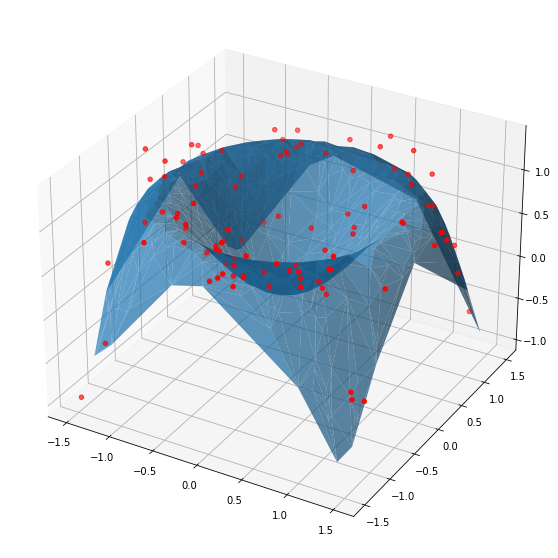

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(X_train[:,0], X_train[:,1], y_target_train, alpha=0.7)
ax.scatter(X_valid[:,0], X_valid[:,1],  y_valid, c="r")

Costruisco una rete neurale identica quella dell'esercizio 11.2.

In [2]:
model1 = tf.keras.Sequential()
model1.add(Dense(128, input_shape=(2,),activation="relu" ))
model1.add(Dense(64, activation="relu" ))
model1.add(Dense(1, activation="linear" ))
model1.compile(optimizer='adam', loss='mse', metrics=['mse'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model1.fit(x=X_train, y=y_train,
          batch_size=30, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(X_valid, y_valid))

Epoch 1/100
17/17 [==============================] - 0s 7ms/step - loss: 0.3460 - mse: 0.3460 - val_loss: 0.3018 - val_mse: 0.3018
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2048 - mse: 0.2048 - val_loss: 0.2918 - val_mse: 0.2918
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1881 - mse: 0.1881 - val_loss: 0.2744 - val_mse: 0.2744
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1794 - mse: 0.1794 - val_loss: 0.2642 - val_mse: 0.2642
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1730 - mse: 0.1730 - val_loss: 0.2529 - val_mse: 0.2529
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1681 - mse: 0.1681 - val_loss: 0.2422 - val_mse: 0.2422
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1614 - mse: 0.1614 - val_loss: 0.2349 - val_mse: 0.2349
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1602 - m

In [12]:
score = model1.evaluate(X_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 0.0432 - mse: 0.0432

Validation loss: 0.04319815710186958
Validation accuracy: 0.04319815710186958


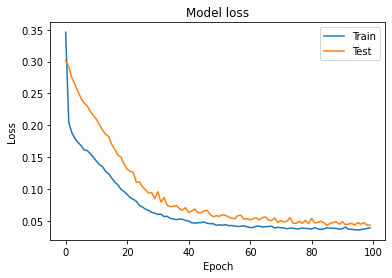

In [13]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

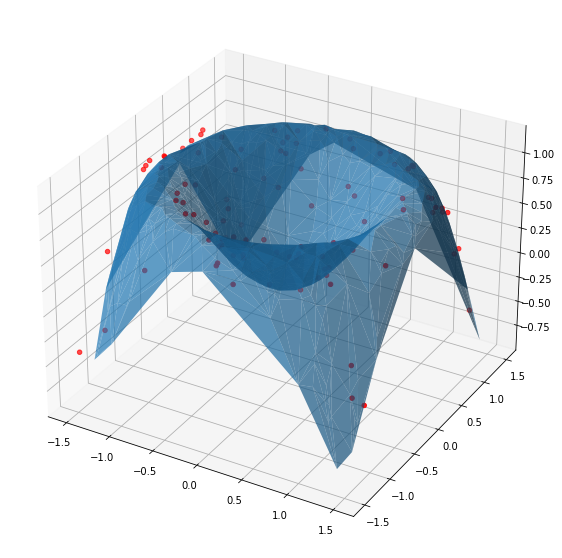

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

y_predicted=model1.predict(X_valid)
#ax.contour(X_train[:,0], X_train[:,1], y_target_train)
#ax.plot_surface(X, Y, y_target_train.reshape(-1,1))
ax.plot_trisurf(X_train[:,0], X_train[:,1], y_target_train, alpha=0.7)
ax.scatter(X_valid[:,0], X_valid[:,1],  y_predicted, c="r");

Sia la loss che la val_loss raggiungono dei buoni risultati, perciò penso che la rete neurale sia riuscita a a fittare in maniera adeguata i nostri dati.